<a href="https://colab.research.google.com/github/sahilbharti123/Bank-Customer-Churn/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer_Churn.csv to Customer_Churn (2).csv


In [ ]:
import io

churn_file = pd.read_csv(io.BytesIO(uploaded['Customer_Churn (2).csv']))
print(churn_file)

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [ ]:
print(churn_file.info)

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

In [ ]:
print(churn_file.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [ ]:
print(churn_file.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


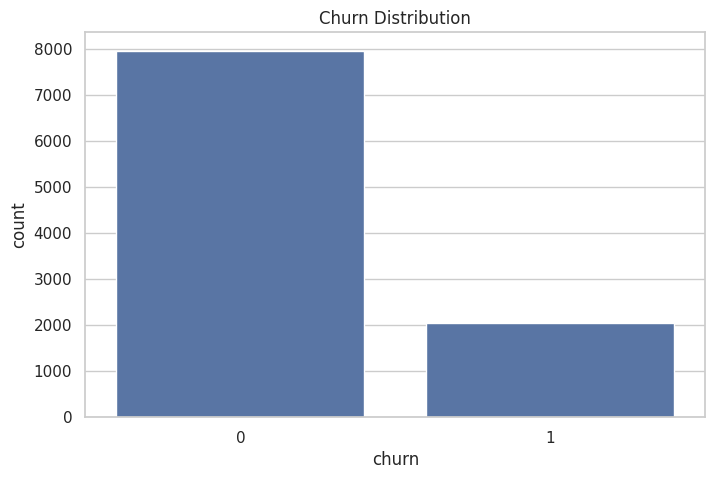

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="churn", data = churn_file)
plt.title("Churn Distribution")
plt.show()

The data is imbalanced

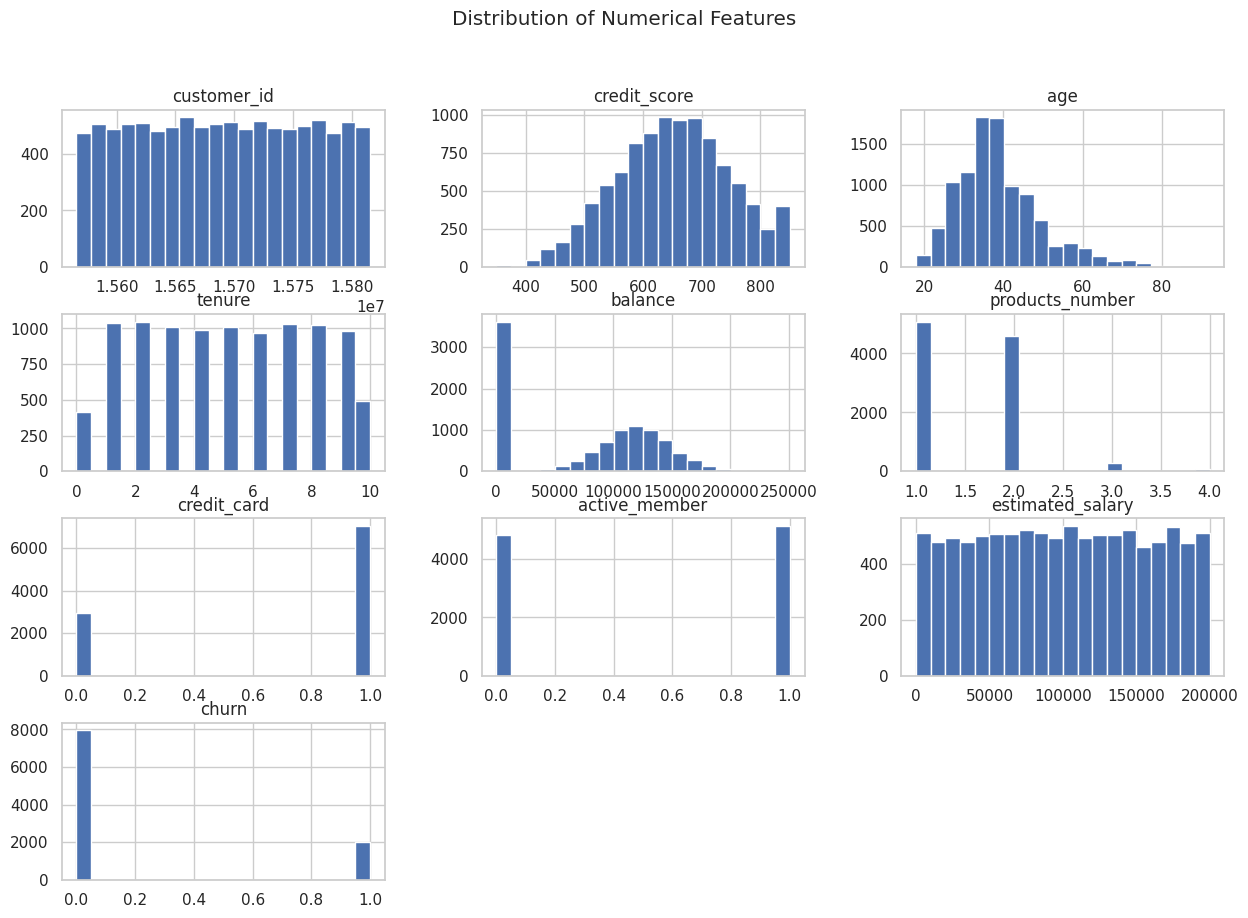

In [ ]:
numerical_features = churn_file.select_dtypes(include=['float64', 'int64']).columns
churn_file[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [ ]:
churn_file = churn_file.drop(['customer_id'], axis=1)

<ipython-input-51-7d419994625a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn_file.corr()


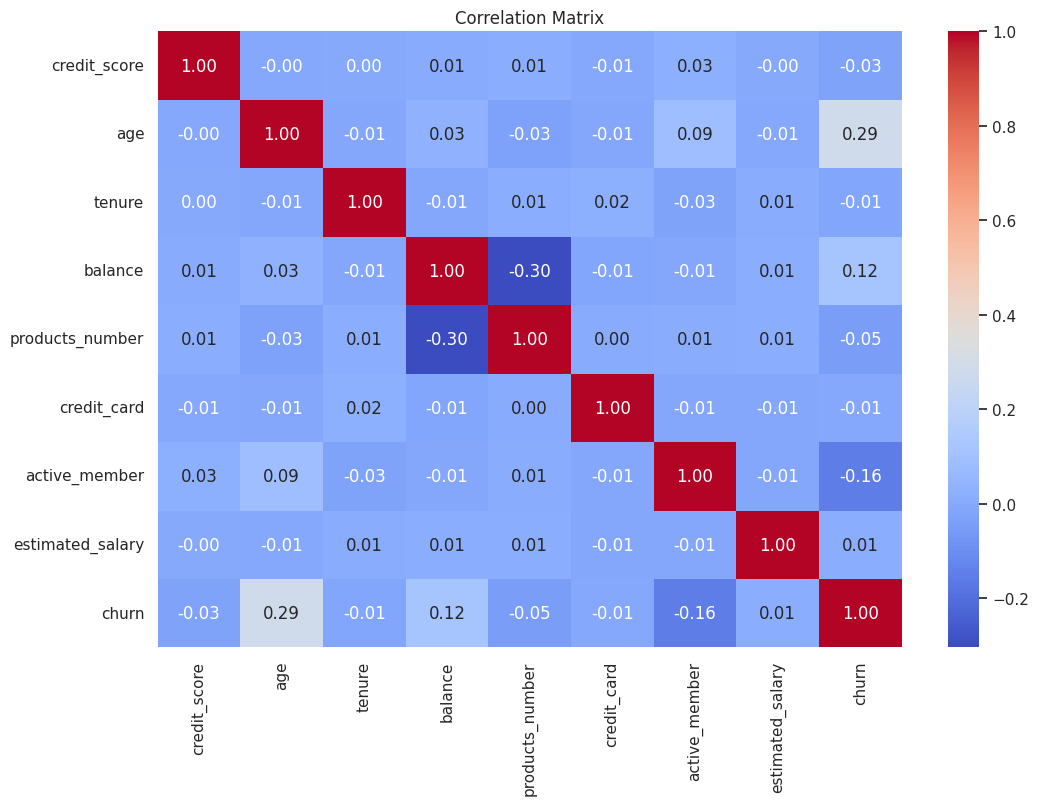

In [ ]:
correlation_matrix = churn_file.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

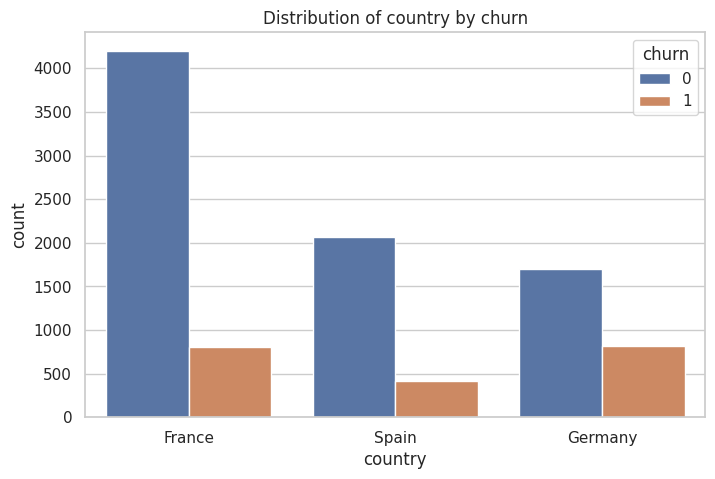

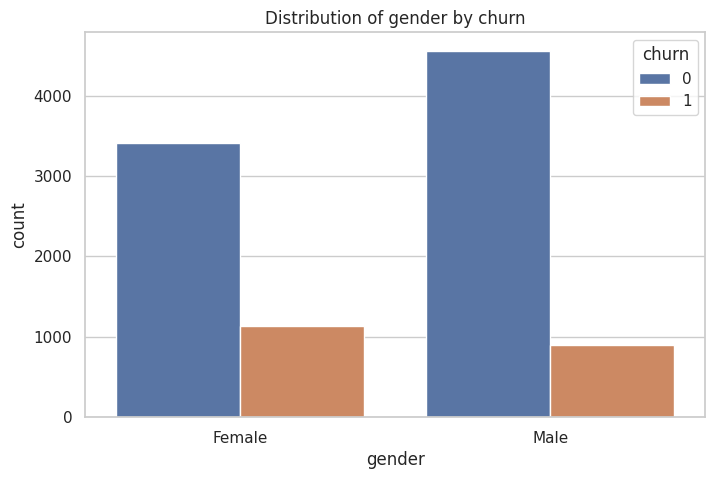

In [ ]:
# Visualize the distribution of categorical features
categorical_features = churn_file.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='churn', data=churn_file)
    plt.title(f'Distribution of {feature} by churn')
    plt.show()

In [ ]:
final_churn_file = pd.get_dummies(churn_file, drop_first = True)

In [ ]:

final_churn_file.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


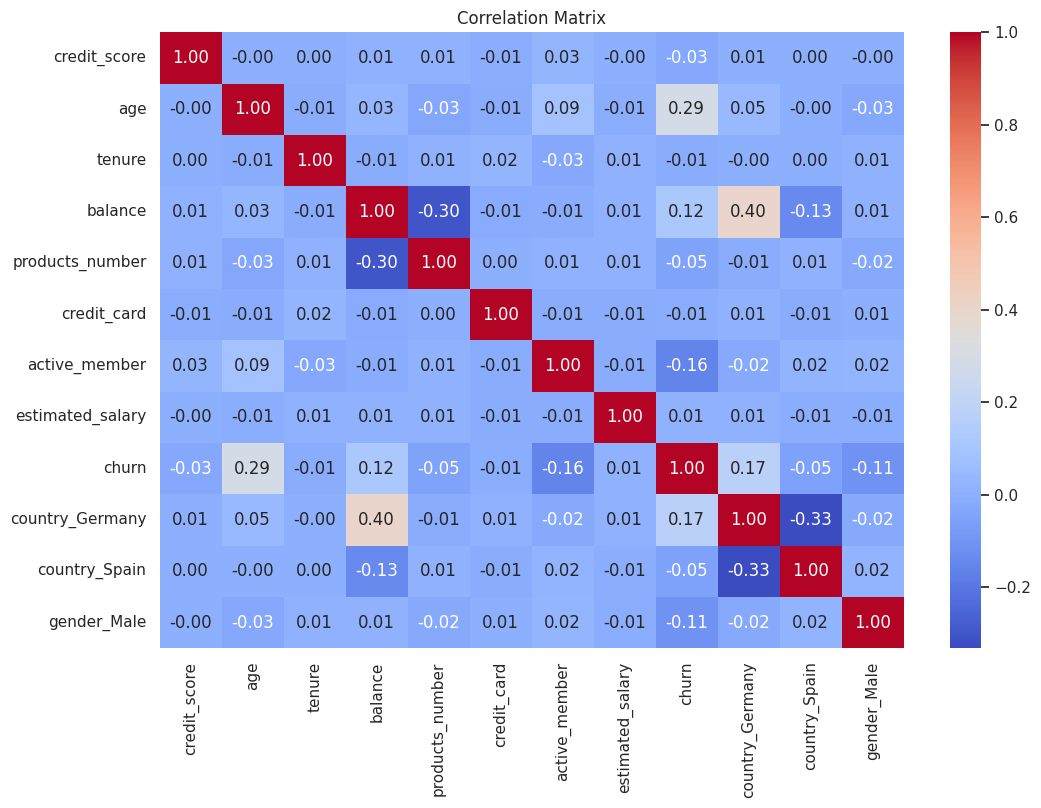

In [ ]:
correlation_matrix = final_churn_file.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = final_churn_file.drop(['churn'], axis = 1)
y = final_churn_file['churn']
print(X)

      credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  country_Germany  country_Spain  \
0             

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Handling class imbalance with SMOTE

# Defining SMOTE
apply_smote = SMOTE()

# Applying SMOTE
X_smote, y_smote = apply_smote.fit_resample(X, y)


# Splitting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

y_predicted = log.predict(X_test)

In [ ]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_predicted))
print("Classification Report:\n", classification_report(y_test, y_predicted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted))
print("Precision:", precision_score(y_test, y_predicted))
print("Recall:", recall_score(y_test, y_predicted))
print("F1 Score:", f1_score(y_test, y_predicted))

Logistic Regression:
Accuracy: 0.7796610169491526
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1633
           1       0.77      0.78      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

Confusion Matrix:
 [[1271  362]
 [ 340 1213]]
Precision: 0.7701587301587302
Recall: 0.7810688989053445
F1 Score: 0.7755754475703326


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.8593848085373509
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1633
           1       0.85      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Confusion Matrix:
 [[1399  234]
 [ 214 1339]]
Precision: 0.8512396694214877
Recall: 0.8622021893110109
F1 Score: 0.8566858605246321


In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train,y_train)

y_pred_svc = svm_model.predict(X_test)

In [ ]:
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))

Support Vector Machine:
Accuracy: 0.8377275580665411
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1633
           1       0.83      0.83      0.83      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

Confusion Matrix:
 [[1374  259]
 [ 258 1295]]
Precision: 0.8333333333333334
Recall: 0.8338699291693497
F1 Score: 0.8336015448986162


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
_, accuracy_nn = nn_model.evaluate(X_test, y_test)
print("Neural Network:")
print("Accuracy:", accuracy_nn)


Epoch 1/10
319/319 [==============================] - 6s 8ms/step - loss: 0.4890 - accuracy: 0.7693 - val_loss: 0.4308 - val_accuracy: 0.8042
Epoch 2/10
319/319 [==============================] - 2s 6ms/step - loss: 0.4094 - accuracy: 0.8151 - val_loss: 0.4017 - val_accuracy: 0.8183
Epoch 3/10
319/319 [==============================] - 2s 6ms/step - loss: 0.3901 - accuracy: 0.8269 - val_loss: 0.3940 - val_accuracy: 0.8242
Epoch 4/10
319/319 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8323 - val_loss: 0.3937 - val_accuracy: 0.8218
Epoch 5/10
319/319 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8329 - val_loss: 0.3859 - val_accuracy: 0.8281
Epoch 6/10
319/319 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8362 - val_loss: 0.3818 - val_accuracy: 0.8328
Epoch 7/10
319/319 [==============================] - 1s 3ms/step - loss: 0.3687 - accuracy: 0.8376 - val_loss: 0.3806 - val_accuracy: 0.8277
Epoch 

In [ ]:
result = pd.DataFrame({'Models': ['Logistic Regression','Random Forest', 'Support Vector Machine', 'Neural Network'],
                       'Accuracy': [accuracy_score(y_test,y_predicted),
                                    accuracy_score(y_test,y_pred_rf),
                                    accuracy_score(y_test,y_pred_svc),
                                    accuracy_nn]})

<ipython-input-69-2836dea4dd24>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Accuracy', data=result, palette="viridis")


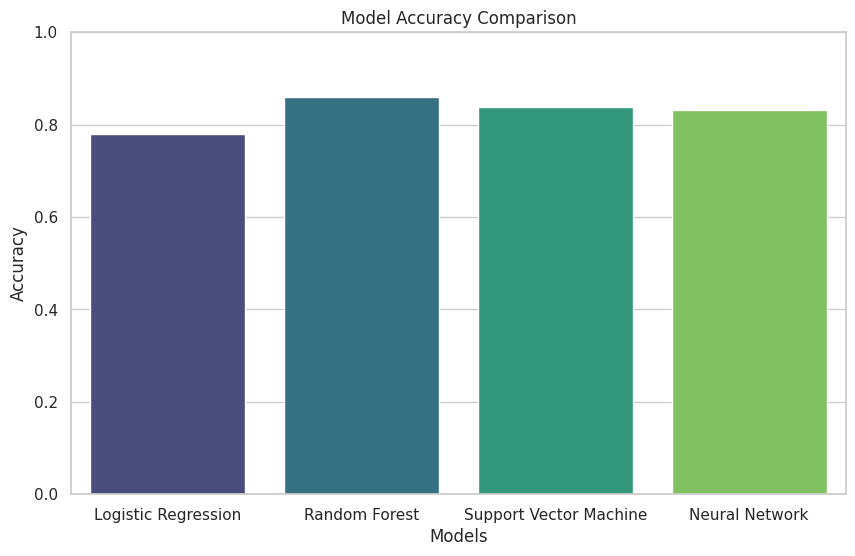

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Models', y='Accuracy', data=result, palette="viridis")

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy percentage
plt.show()

In [ ]:
import pickle
pickle.dump(rf_model, open('churn_model.pkl', 'wb'))